# Bài 1

In [219]:
import pandas as pd
data = pd.read_csv('D:\downloads\housing.csv')

data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


500001.0
14999.0


<AxesSubplot:xlabel='housing_median_age', ylabel='Count'>

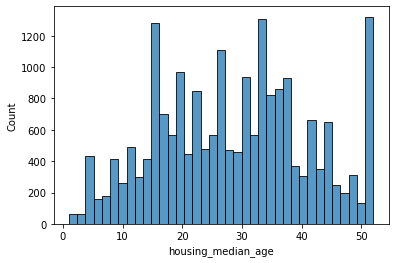

In [220]:
import matplotlib.pyplot as plt
import seaborn as sns
print(max(data['median_house_value']))
print(min(data['median_house_value']))
sns.histplot(data['housing_median_age'])

Câu hỏi 2: Hãy cho biết bộ dữ liệu có bao nhiêu dòng, và có tổng cộng bao nhiêu thuộc tính? Liệt kê ra các thuộc tính. Sử dụng: data.columns.

In [221]:
print(len(data))
data.columns

20640


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

Câu hỏi 3: Cho biết số lượng các giá trị NA trong thuộc tính.

In [222]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

* Chuẩn bị dữ liệu huấn luyện.
Câu hỏi 4: Vẽ ma trận tương quan giữa các thuộc tính và thể hiện lên màn hình theo code gợi ý. Cho biết mức độ tương quan giữa các thuộc tính với nhau Dựa vào mức độ tương quan, ta chọn ra được thuộc tính thu nhập bình quân - median_income. Để thể hiện phân bố dữ liệu giữa thuộc tính media_income và thuộc tính median_house_values, ta dùng biểu đồ tán xạ (scatter plot) như sau:

<AxesSubplot:>

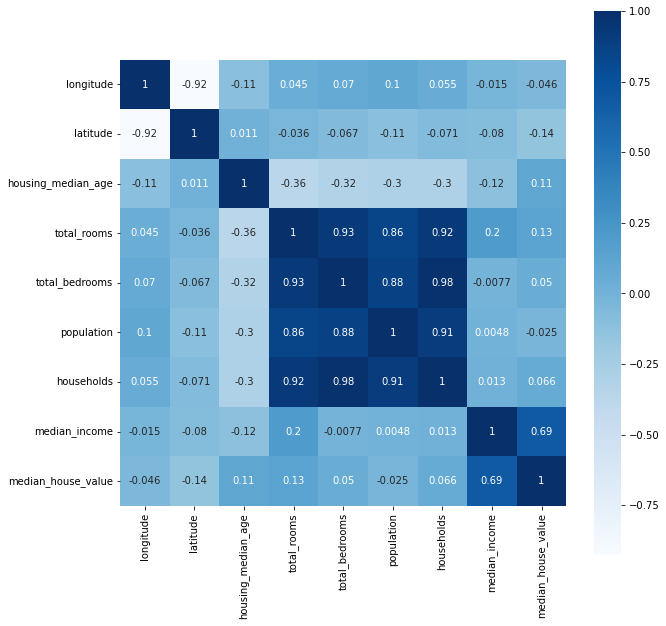

In [223]:
import matplotlib.pyplot as plt
import seaborn as sns
# tinh su phu thuoc cua tung thuoc tinh
correlation = data.corr(method='pearson')
fig = plt.subplots(figsize=(10,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='Blues')

Câu hỏi 5: Vẽ biểu đồ tán xạ (scatter plot) giữa thuộc tính median_income và thuộc tính median_house_value.

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

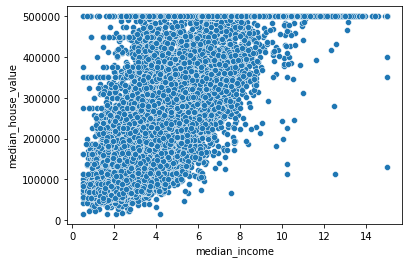

In [224]:
import seaborn as sns
import pandas as pd
x_data = data["median_income"]
y_data= data["median_house_value"]
data_visualize = pd.DataFrame({"median_income": x_data, "median_house_value": y_data})
# Ve bieu do tan xa du lieu huan luyen
sns.scatterplot(data=data_visualize, x="median_income", y="median_house_value")

In [244]:
x_data = data["median_income"]
y_data= data["median_house_value"]

Câu hỏi 6: Hãy phân chia dữ liệu huấn luyện (X,y) thành tập huấn luyện và tập kiểm thử theo tỉ lệ lần lượt là 8-2. Cho biết chiều (shape) của từng tập dữ liệu.

In [245]:
from sklearn.model_selection import train_test_split 
train, test = train_test_split(data, test_size = 0.2)

In [246]:
print(train.shape)
print(test.shape)

(16512, 10)
(4128, 10)


3 Huấn luyện mô hình và kiểm thử


In [247]:
# định nghĩa x_train, y_train, y_train, y_test
x_train = train['median_income']
x_test = test['median_income']
y_train = train['median_house_value']
y_test = test['median_house_value']

In [248]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(1, 55))
y_train_transformed =sc.fit_transform(y_train.values.reshape(-1,1)).reshape(-1)
y_test_transformed =sc.fit_transform(y_test.values.reshape(-1,1)).reshape(-1)

In [249]:
y_train_transformed


array([50.94712187, 55.        , 24.1253768 , ..., 22.90063958,
       10.09656867, 27.58804294])

In [250]:
x_train

5423      3.6019
5361     11.1768
15765     3.2981
17600     5.0360
1907      3.7891
          ...   
4240      3.2462
8849     15.0001
7116      5.1250
5156      1.7656
9813      3.1543
Name: median_income, Length: 16512, dtype: float64

In [251]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train.values.reshape(-1,1), y_train_transformed )

LinearRegression()

Câu hỏi 7: Dự đoán kết quả cho tập kiểm tra dựa vào mô hình đã huấn luyện, kết quả
lưu vào biến y_pred.

In [252]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(x_test.values.reshape(-1,1))
mean_squared_error(y_test_transformed, y_pred, squared =True)

87.32696725881499

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

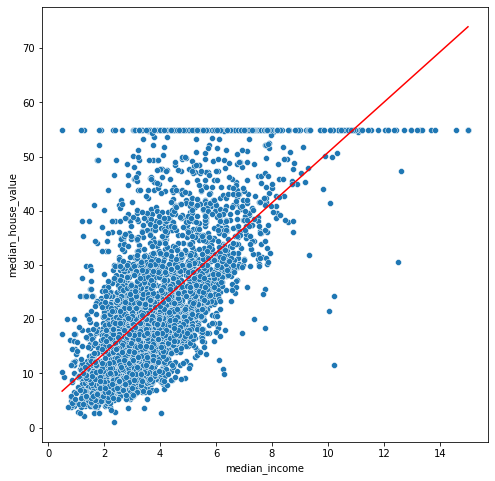

In [253]:
import seaborn as sns

test_true = pd.DataFrame({'median_income':x_test.values.reshape(-1), 'median_house_value': y_test_transformed})
test_pred = pd.DataFrame({'median_income': x_test.values.reshape(-1),'median_house_value': y_pred})

fig = plt.figure(figsize = (8,8))

sns.lineplot(data=test_pred, x = "median_income",y = "median_house_value", color = 'red')
sns.scatterplot(data = test_true, x="median_income", y="median_house_value")

Cross validation

In [254]:
x = data['median_income']
y = data['median_house_value']
y_transformed = sc.fit_transform(y.values.reshape(-1,1)).reshape(-1)

In [255]:
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

kf = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 42)

avg_mse = []
for train_index, test_index in kf.split(x, y_transformed):
    x_train = x.values[train_index].reshape(-1,1)
    y_train = y_transformed[train_index]
    
    x_test = x.values[test_index].reshape(-1,1)
    y_test = y_transformed[test_index]
    
    model = LinearRegression()
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    result = mean_squared_error(y_test, y_pred, squared = True)
    
    #Lưu lại kết quả từng fold vào avd_mse
    avg_mse.append(result)

In [256]:
x_train

array([[1.23  ],
       [1.5394],
       [7.875 ],
       ...,
       [4.275 ],
       [3.5288],
       [1.7802]])

In [257]:
y_train

array([14.73943613, 21.59796454, 38.51047212, ..., 31.10637894,
       20.45116515, 10.2190424 ])

In [258]:
avg_mse

[87.90581581394004,
 85.29054554832334,
 89.37283873635471,
 89.30774651736782,
 87.52453948479425,
 85.60979878870158,
 86.3045034115234,
 88.07837550250288,
 89.67777041636644,
 85.792519146726]

In [259]:
import numpy as np
np.mean(np.array(avg_mse))

87.48644533666005

Vậy ta có kết luận rằng kết quả của phương pháp Linear Regression kém hơn kết quả của phương pháp Cross valiation (Cùng độ đo MSE)

# Bài 2

In [260]:
from sklearn.impute import SimpleImputer

xx = data['total_bedrooms']
yy = data['median_house_value']

imp = SimpleImputer(missing_values = np.nan, strategy = 'median')
xx_data = imp.fit_transform(xx.values.reshape(-1,1))

<AxesSubplot:xlabel='total_bedrooms', ylabel='median_house_value'>

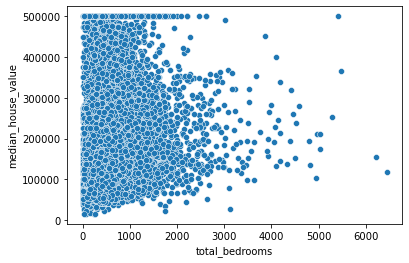

In [261]:
datanew =pd.DataFrame({"total_bedrooms": xx_data.flatten() ,"median_house_value": y_data })
sns.scatterplot(data=datanew, x="total_bedrooms",y="median_house_value")

In [262]:
from sklearn.model_selection import train_test_split 
train, test = train_test_split(datanew, test_size = 0.2)

In [263]:
xx_train = train['total_bedrooms']
xx_test = test['total_bedrooms']
yy_train = train['median_house_value']
yy_test = test['median_house_value']

In [264]:
xx_train.isnull().sum()

0

In [265]:
xx_train

11510     342.0
8739      748.0
11564     405.0
3276      208.0
18930     616.0
          ...  
2688      480.0
10194     318.0
8066      214.0
5499     1180.0
13044     441.0
Name: total_bedrooms, Length: 16512, dtype: float64

In [266]:
print(train.shape)
print(test.shape)

(16512, 2)
(4128, 2)


In [267]:
from sklearn.preprocessing import MinMaxScaler
sc2 = MinMaxScaler(feature_range=(0,6.5))
sc = MinMaxScaler(feature_range= (-1, 55))
xx_train_transformed = sc2.fit_transform(xx_data)
xx_test_transformed = sc2.fit_transform(xx_test.array.reshape(-1, 1))
yy_train_transformed = sc.fit_transform(y.values.reshape(-1, 1)).reshape(-1)
yy_test_transformed = sc.fit_transform(yy_test.array.reshape(-1, 1)).reshape(-1)

In [268]:
xx_train_transformed

array([[0.12911235],
       [1.11460273],
       [0.19064246],
       ...,
       [0.48820608],
       [0.41154562],
       [0.62034451]])

In [269]:
from sklearn.linear_model import LinearRegression

model_2 = LinearRegression()
model_2.fit(xx_train_transformed, yy_train_transformed )

LinearRegression()

In [270]:
yy_test_transformed

array([28.48947839, 39.95499812, 38.58098317, ..., 19.03302254,
       23.42063332, 28.92823947])

In [271]:
xx_test_transformed

array([[0.50450171],
       [0.32994412],
       [1.10384974],
       ...,
       [0.53880782],
       [0.60338404],
       [0.49138466]])

In [272]:
from sklearn.metrics import mean_squared_error

yy_pred= model.predict(xx_test_transformed)

mean_squared_error(yy_test_transformed, yy_pred, squared = True)

380.2442137647669

<AxesSubplot:xlabel='total_bedrooms', ylabel='median_house_value'>

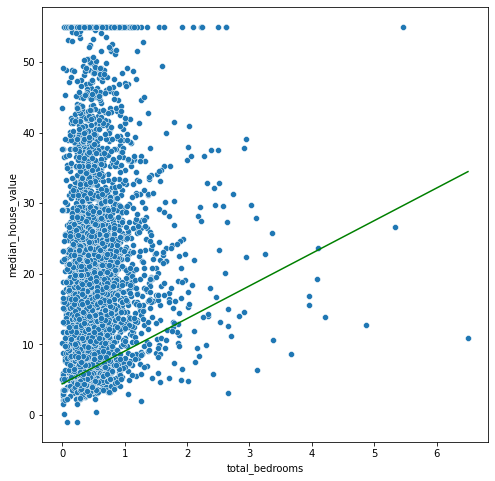

In [273]:
import seaborn as sns

test_true_2 = pd.DataFrame({'total_bedrooms':xx_test_transformed.flatten() , 'median_house_value': yy_test_transformed})
test_pred_2 = pd.DataFrame({'total_bedrooms': xx_test_transformed.flatten() ,'median_house_value': yy_pred})

fig = plt.figure(figsize = (8,8))

sns.lineplot(data=test_pred_2, x = "total_bedrooms",y = "median_house_value", color = 'green')
sns.scatterplot(data = test_true_2, x="total_bedrooms", y="median_house_value")

In [274]:
from sklearn.impute import SimpleImputer

xx = data['total_bedrooms']
yy = data['median_house_value']
imp = SimpleImputer(missing_values = np.nan, strategy = 'median')
xx_data = imp.fit_transform(xx.values.reshape(-1,1))

In [275]:
yy_transformed = sc.fit_transform(yy.values.reshape(-1,1)).reshape(-1)

In [276]:
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

kf = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 42)

avg_mse = []
for train_index, test_index in kf.split(xx_data, yy_transformed):
    xx_train= xx_data[train_index].reshape(-1,1)
    yy_train = yy_transformed[train_index]
    
    xx_test = xx_data[test_index].reshape(-1,1)
    yy_test = yy_transformed[test_index]
    
    model = LinearRegression()
    model.fit(xx_train, yy_train)
    
    yy_pred = model.predict(xx_test)
    result = mean_squared_error(yy_test, yy_pred, squared = True)
    
    #Lưu lại kết quả từng fold vào avd_mse
    avg_mse.append(result)

In [277]:
avg_mse

[174.21014533429016,
 169.97792427108425,
 181.43484637005878,
 181.12660397196083,
 175.791088776252]

In [278]:
import numpy as np
np.mean(np.array(avg_mse))

176.50812174472918

# Bài 3

In [279]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [280]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [281]:
from sklearn.impute import SimpleImputer

imp =SimpleImputer(missing_values = np.nan, strategy = 'median')
processed = imp.fit_transform(data['total_bedrooms'].values.reshape(-1,1))

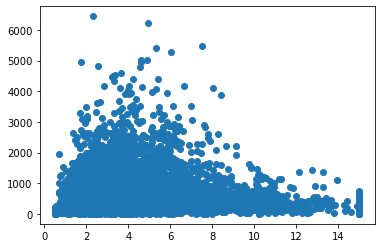

In [282]:
import matplotlib.pyplot as plt

plt.scatter(x=data['median_income'], y=processed)

In [283]:
from sklearn.preprocessing import MinMaxScaler

sc_value = MinMaxScaler(feature_range=(1,55))
sc_bedrooms = MinMaxScaler(feature_range=(0,600))
sc_income = MinMaxScaler(feature_range=(1,15))

y = sc.fit_transform(data['median_house_value'].values.reshape(-1,1)).reshape(-1)
x1 = sc_income.fit_transform(data['median_income'].values.reshape(-1,1)).reshape(-1)
x2 = sc_bedrooms.fit_transform(processed.reshape(-1,1)).reshape(-1)


In [284]:
dt = pd.DataFrame({'median_income': x1, 'total_bedrooms': x2, 'median_house_value': y })

D:\Anacoda\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


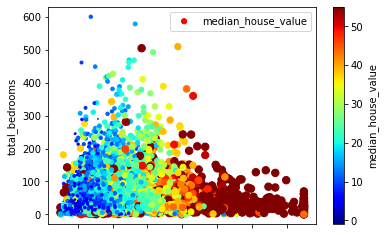

In [285]:
dt.plot(
    kind='scatter', x='median_income', y='total_bedrooms', s='median_house_value',
    label='median_house_value', c='median_house_value',
    cmap=plt.get_cmap('jet'), colorbar=True
    )
plt.legend()

In [286]:
dt

,median_income,total_bedrooms,median_house_value
0,8.555358,11.918063,49.526917
1,8.532379,102.886406,38.661808
2,7.524393,17.597765,37.922842
3,5.965780,21.787709,36.675836
4,4.230866,25.977654,36.779753
...,...,...,...
20635,2.023820,34.729981,6.285859
20636,2.985945,13.873371,6.170395
20637,2.158701,45.065177,7.925439
20638,2.320134,37.988827,7.047917


In [287]:
dt.isna().sum()

median_income         0
total_bedrooms        0
median_house_value    0
dtype: int64

In [290]:
dtt = dt.to_numpy()

In [291]:
dtt

array([[  8.55535786,  11.91806331,  49.52691741],
       [  8.53237886, 102.88640596,  38.66180758],
       [  7.52439277,  17.59776536,  37.92284156],
       ...,
       [  2.15870126,  45.06517691,   7.92543948],
       [  2.32013352,  37.98882682,   7.04791733],
       [  2.82354726,  57.26256983,   7.5905955 ]])

In [292]:
y = dtt[:, -1]
x = np.delete(dtt, -1, axis=1)

In [293]:
y

array([49.52691741, 38.66180758, 37.92284156, ...,  7.92543948,
        7.04791733,  7.5905955 ])

In [294]:
x

array([[  8.55535786,  11.91806331],
       [  8.53237886, 102.88640596],
       [  7.52439277,  17.59776536],
       ...,
       [  2.15870126,  45.06517691],
       [  2.32013352,  37.98882682],
       [  2.82354726,  57.26256983]])

In [295]:
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

kf = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

avg_mse = []

for train_index, test_index in kf.split(x, y):
 x_train = x[train_index]
 y_train = y[train_index]
    
 x_test = x[test_index]
 y_test = y[test_index]
    
 model = LinearRegression()
 model.fit(x_train, y_train)
    
 y_pred = model.predict(x_test)
 result = mean_squared_error(y_test, y_pred, squared=True)
 
 # Lưu lại kết quả từng fold vào avg_mse 
 avg_mse.append(result)

In [296]:
avg_mse

[93.98450706682557,
 90.99022893866403,
 95.40285628164317,
 95.6684334677502,
 93.80871796936619,
 91.48058094951533,
 92.09496373932117,
 94.40250794431722,
 95.93532222239907,
 91.71891611353172]

In [297]:
import numpy as np
np.mean(np.array(avg_mse))

93.54870346933336

In [298]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred, squared =True)

91.71891611353172

Ta thấy kết quả bài 3 lớn hơn bài 1 nên khi kết hợp 2 thuộc tính median_income và total_bedrooms thuộc tính median_income có giá trị cao hơn thuộc tính median_income có giá trị dự đoán median_house_value.
